#### Initial Descriptive Stats

1. Loading Data

Since the processed job ad data are stored in CSV files, first import the necessary libraries and read the data.

In [1]:
import pandas as pd
import os

# Set the path to the processed CSV files
data_folder = "processed_data"  # Update this if needed

# List all CSV files in the folder
csv_files = [f for f in os.listdir(data_folder) if f.endswith('.csv')]

# Load all CSV files into a single DataFrame
df_list = [pd.read_csv(os.path.join(data_folder, file)) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)  # Merge them into one DataFrame

# Display first few rows
df.head()

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df.head().to_csv("head_of_data.csv", index=False, encoding="utf-8")

2. Check Basic Info

This will give an overview of columns, data types, and missing values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30905 entries, 0 to 30904
Columns: 264 entries, summary_AutomatchType to details
dtypes: bool(11), float64(105), int64(3), object(145)
memory usage: 60.0+ MB


3. Summary Statistics

To get a summary of numeric columns:

In [5]:
#df.describe()

# For categorical columns

df.describe(include="object")


,summary_Title,summary_JobHeadline,summary_Presentation,summary_HiringOrgName,summary_WorkPlaceAddress,summary_WorkPlaceCity,summary_PostingCreated,summary_LastDateApplication,summary_FormattedLastDateApplication,summary_AssignmentStartDate,...,details_ShowPrint,details_JobPositionPosting_ApplicationDetails_DailyWorkTimeMorning,details_JobPositionPosting_ApplicationDetails_DailyWorkTimeVarious,details_JobPositionPosting_RecruitingCompany_Name,details_JobPositionPosting_RecruitingCompany_Address_AddressLine,details_JobPositionPosting_RecruitingCompany_Address_Country_Name,details_JobPositionPosting_RecruitingCompany_Address_Region_Name,details_JobPositionPosting_RecruitingCompany_Address_City,details_JobPositionPosting_RecruitingCompany_PhoneNumber_Description,details_JobPositionPosting_RecruitingCompany_WebAddress
count,30905,30905,30867,30905,27298,29444,30905,30905,30905,30905,...,30854,12540,12540,1175,1010,354,343,1010,1010,282
unique,29416,29416,29011,8411,13379,573,6948,969,134,1,...,1,2,2,93,56,1,4,56,1,43
top,Rengøringsassistent,Rengøringsassistent,Kunne du tænke dig at få muligheden for at ska...,Københavns Kommune,,København NV,2022-05-04T00:00:00,2022-05-31T00:00:00,16. februar 2025,0001-01-01T00:00:00,...,False,False,False,Workindenmark,Tolderlundsvej 2,Danmark,Syddanmark,Odense C,Primary,http://silkeborgkommune.dk/
freq,34,34,66,895,924,1028,1505,1100,1106,30905,...,30854,11955,11461,165,79,354,105,79,1010,30


4. Check Missing Values

See if there are missing values in the dataset:

In [6]:
df.isnull().sum()

summary_AutomatchType                                              0
summary_Abroad                                                     0
summary_Weight                                                     0
summary_Title                                                      0
summary_JobHeadline                                                0
                                                               ...  
details_JobPositionPosting_RecruitingCompany_Address_Region    30905
details_JobPositionPosting_RecruitingCompany_Address           30905
details_JobPositionPosting_RecruitingCompany_PhoneNumber       30905
details_JobPositionPosting_HiringOrg                           30905
details                                                        30905
Length: 264, dtype: int64

5. Distribution of Job Titles

Check the most common job titles:

In [8]:
df["summary_Occupation"].value_counts().head(20)  # Top 20 job titles

summary_Occupation
Pædagog                          1660
Sygeplejerske                    1320
Social- og sundhedsassistent     1297
Social- og sundhedshjælper        783
Rengøringsassistent               775
Folkeskolelærer                   654
Handicaphjælper                   584
Kok                               558
Butiksassistent                   556
Elektriker                        466
Lager- og logistikmedarbejder     465
Studentermedhjælp                 404
Tømrer                            403
Produktionsmedarbejder            402
Pædagogmedhjælper                 399
Kundeservicemedarbejder           360
Socialpædagog                     354
Læge                              350
Køkkenmedhjælper                  347
Tjener                            345
Name: count, dtype: int64

6. Plotting Descriptive Statistics

Creating visualizations to explore the data.

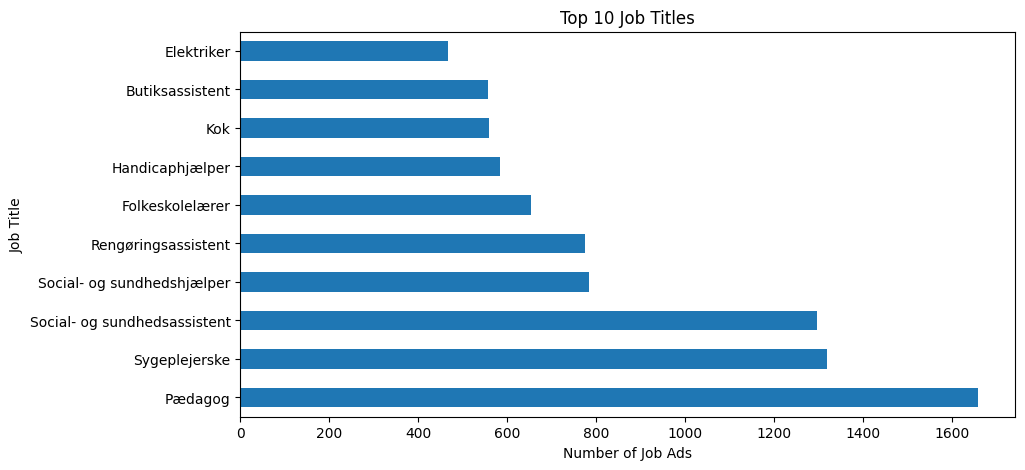

In [9]:
## Distribution of job titles
import matplotlib.pyplot as plt

df["summary_Occupation"].value_counts().head(10).plot(kind="barh", figsize=(10,5), title="Top 10 Job Titles")
plt.xlabel("Number of Job Ads")
plt.ylabel("Job Title")
plt.show()

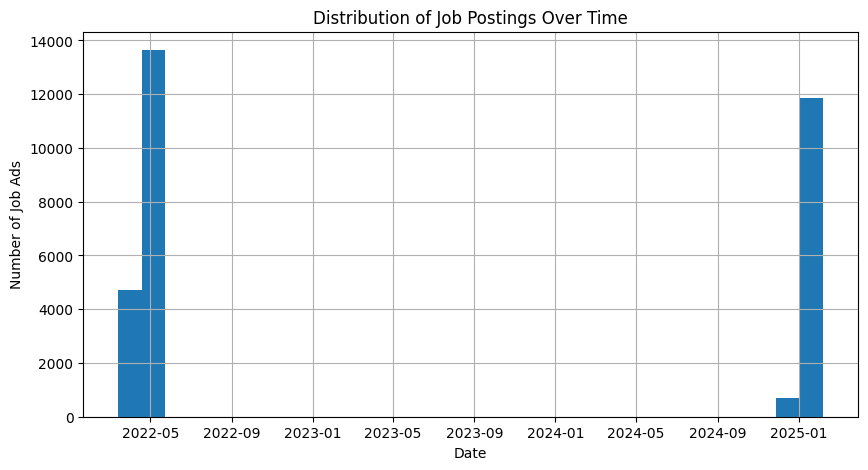

In [10]:
## Job postings over time
# Note: Make sure the date posted column it's in datetime format or explicitly convert it to datetime:

df["summary_PostingCreated"] = pd.to_datetime(df["summary_PostingCreated"], errors="coerce")
df["summary_PostingCreated"].hist(bins=30, figsize=(10,5))
plt.title("Distribution of Job Postings Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Job Ads")
plt.show()

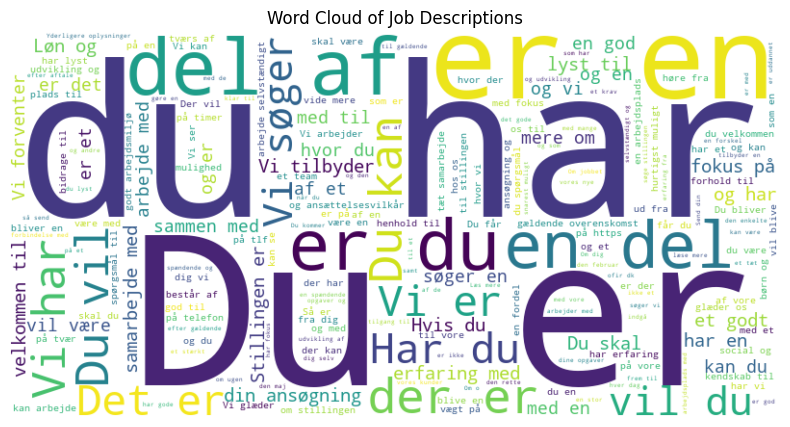

In [12]:
##Word Cloud of Job Descriptions

from wordcloud import WordCloud

text = " ".join(df["details_JobPositionPosting_JobPositionInformation_Purpose"].dropna())  # Combine job descriptions into one string
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Job Descriptions")
plt.show()

7. Check for Duplicates

In [13]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# If needed, remove duplicates
df = df.drop_duplicates()

8. Correlation Between Numeric Features

In [15]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

ValueError: could not convert string to float: '3 Miljøterapeuter søges til charmerende bosted på landet idet vi indskriver flere beboere.'

<Figure size 800x600 with 0 Axes>

#### Some more specific descriptive stats

1. Load Data & Preprocess

Ensure the dataset is loaded correctly, assuming there is a CSV with a column for job descriptions (description) and a column for the year (year).

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
from textstat import flesch_reading_ease

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset (adjust file path as needed)
df = pd.read_csv("jobnet_sample_extracted_data.csv")  

# Ensure 'year' is a numeric column and has the correct name
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Drop rows with missing descriptions
df = df.dropna(subset=['description'])

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


FileNotFoundError: [Errno 2] No such file or directory: 'your_job_ads.csv'

2. Word Count Distribution

In [ ]:
# Create word count column
df['word_count'] = df['description'].apply(lambda x: len(word_tokenize(x)))

# Summary statistics
print(df.groupby('year')['word_count'].describe())

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='word_count', hue='year', bins=30, kde=True)
plt.title("Word Count Distribution by Year")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend(title="Year")
plt.show()

3. Lexical Diversity

Lexical diversity is the ratio of unique words to total words in a text.

In [ ]:
def lexical_diversity(text):
    words = word_tokenize(text)
    return len(set(words)) / len(words) if len(words) > 0 else 0

df['lexical_diversity'] = df['description'].apply(lexical_diversity)

# Summary statistics
print(df.groupby('year')['lexical_diversity'].describe())

# Boxplot of lexical diversity
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='year', y='lexical_diversity')
plt.title("Lexical Diversity by Year")
plt.xlabel("Year")
plt.ylabel("Lexical Diversity (Unique Words / Total Words)")
plt.show()

4. Readability Scores (Flesch-Kincaid)

A lower score means harder-to-read text, while a higher score means easier readability.

In [ ]:
df['readability'] = df['description'].apply(flesch_reading_ease)

# Summary statistics
print(df.groupby('year')['readability'].describe())

# Boxplot of readability scores
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='year', y='readability')
plt.title("Readability Scores by Year")
plt.xlabel("Year")
plt.ylabel("Flesch-Kincaid Readability Score")
plt.show()

5. Most Frequent Words

In [ ]:
stop_words = set(stopwords.words('danish'))  

def get_most_common_words(texts, n=20):
    words = []
    for text in texts:
        words.extend([word.lower() for word in word_tokenize(text) if word.isalnum() and word.lower() not in stop_words])
    return Counter(words).most_common(n)

# Get top words for each year
for year in df['year'].unique():
    print(f"\nMost common words in {year}:")
    print(get_most_common_words(df[df['year'] == year]['description']))

# Word cloud for recent job ads (2024/2025)
recent_texts = ' '.join(df[df['year'] >= 2024]['description'])
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(recent_texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Recent Job Ads (2024/2025)")
plt.show()